In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras import regularizers

import pickle

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
df.drop('Id',inplace=True,axis=1)

# Univariate Analysis

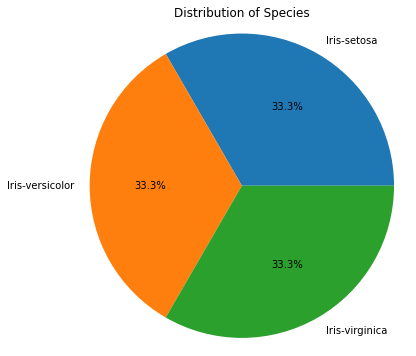

In [8]:
# Count the occurrences of each species
species_counts = df['Species'].value_counts()

# Create a pie plot
plt.figure(figsize=(6, 6))
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Species')
plt.axis('equal')
plt.show()

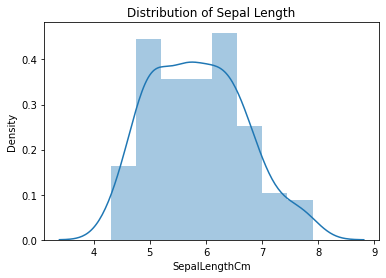

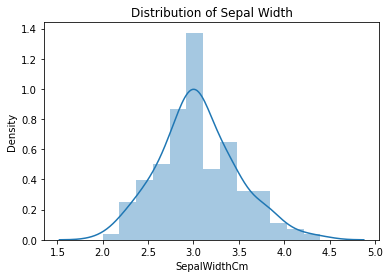

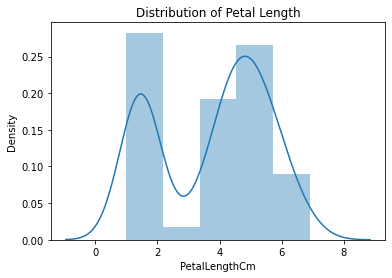

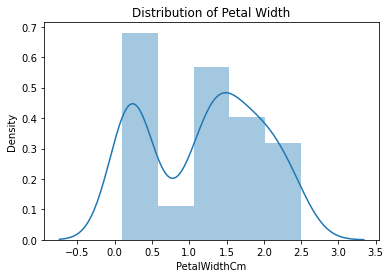

In [9]:
sns.distplot(df['SepalLengthCm'])
plt.title('Distribution of Sepal Length')
plt.show()

sns.distplot(df['SepalWidthCm'])
plt.title('Distribution of Sepal Width')
plt.show()

sns.distplot(df['PetalLengthCm'])
plt.title('Distribution of Petal Length')
plt.show()

sns.distplot(df['PetalWidthCm'])
plt.title('Distribution of Petal Width')
plt.show()

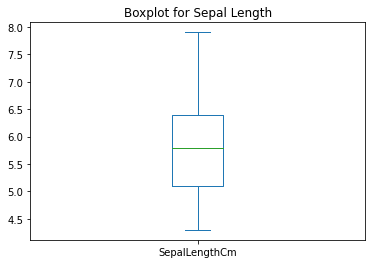

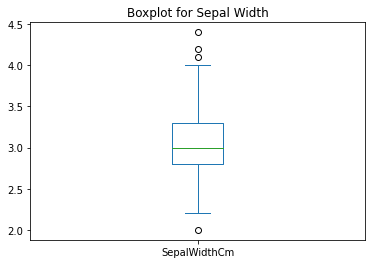

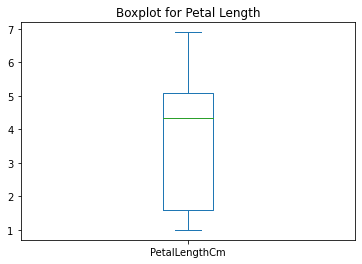

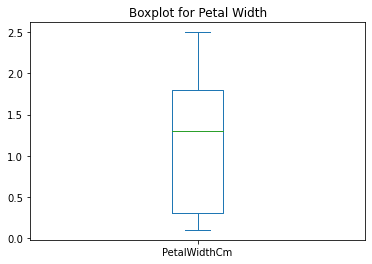

In [10]:
df['SepalLengthCm'].plot(kind='box')
plt.title('Boxplot for Sepal Length')
plt.show()

df['SepalWidthCm'].plot(kind='box')
plt.title('Boxplot for Sepal Width')
plt.show()

df['PetalLengthCm'].plot(kind='box')
plt.title('Boxplot for Petal Length')
plt.show()

df['PetalWidthCm'].plot(kind='box')
plt.title('Boxplot for Petal Width')
plt.show()

# Multivariate Analysis

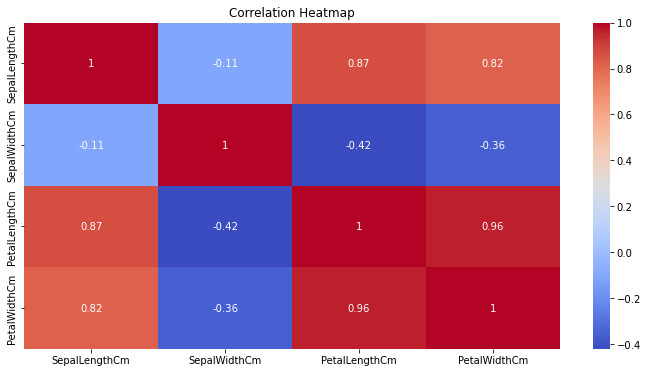

In [11]:
plt.figure(figsize=(12,6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

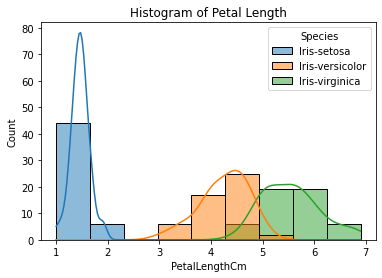

In [12]:
# Histogram of "Petal Length" with hue "Species"
sns.histplot(data=df, x='PetalLengthCm', hue='Species', kde=True)
plt.title('Histogram of Petal Length')
plt.show()

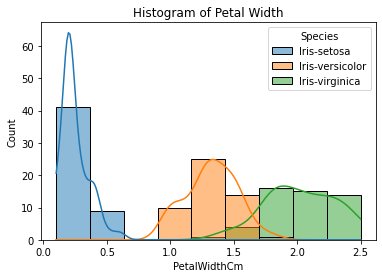

In [13]:
# Histogram of "Petal Width" with hue "Species"
sns.histplot(data=df, x='PetalWidthCm', hue='Species', kde=True)
plt.title('Histogram of Petal Width')
plt.show()

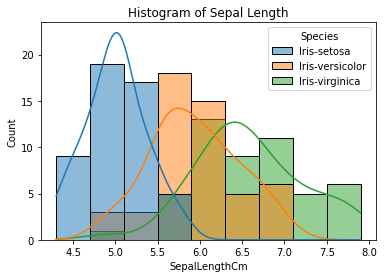

In [14]:
# Histogram of "Sepal Length" with hue "Species"
sns.histplot(data=df, x='SepalLengthCm', hue='Species', kde=True)
plt.title('Histogram of Sepal Length')
plt.show()

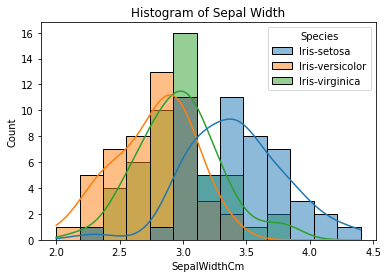

In [15]:
# Histogram of "Sepal Width" with hue "Species"
sns.histplot(data=df, x='SepalWidthCm', hue='Species', kde=True)
plt.title('Histogram of Sepal Width')
plt.show()

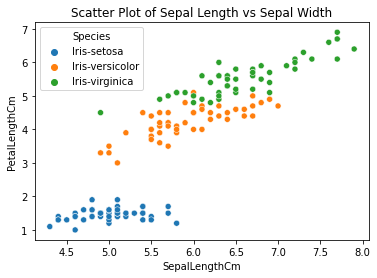

In [16]:
# Scatter plot of 'Sepal Length' v/s 'Petal Length' with hue 'Species'
sns.scatterplot(x='SepalLengthCm', y='PetalLengthCm', hue='Species', data=df)
plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.show()

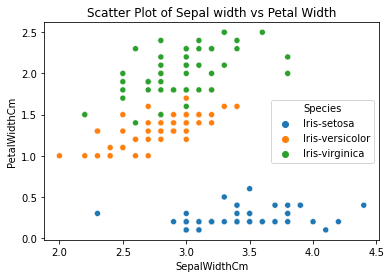

In [17]:
# Scatter plot of Sepal Width v/s Petal Width with hue 'Species'
sns.scatterplot(x='SepalWidthCm', y='PetalWidthCm', hue='Species', data=df)
plt.title('Scatter Plot of Sepal width vs Petal Width')
plt.show()

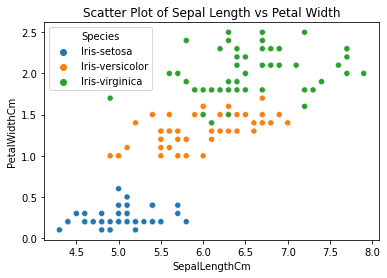

In [18]:
# Scatter plot of Sepal Length v/s Petal Width with hue 'Species'
sns.scatterplot(x='SepalLengthCm', y='PetalWidthCm', hue='Species', data=df)
plt.title('Scatter Plot of Sepal Length vs Petal Width')
plt.show()

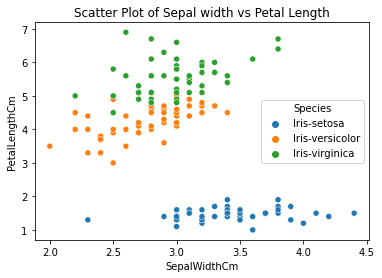

In [19]:
# Scatter plot of Sepal Width v/s Petal Length with hue 'Species'
sns.scatterplot(x='SepalWidthCm', y='PetalLengthCm', hue='Species', data=df)
plt.title('Scatter Plot of Sepal width vs Petal Length')
plt.show()

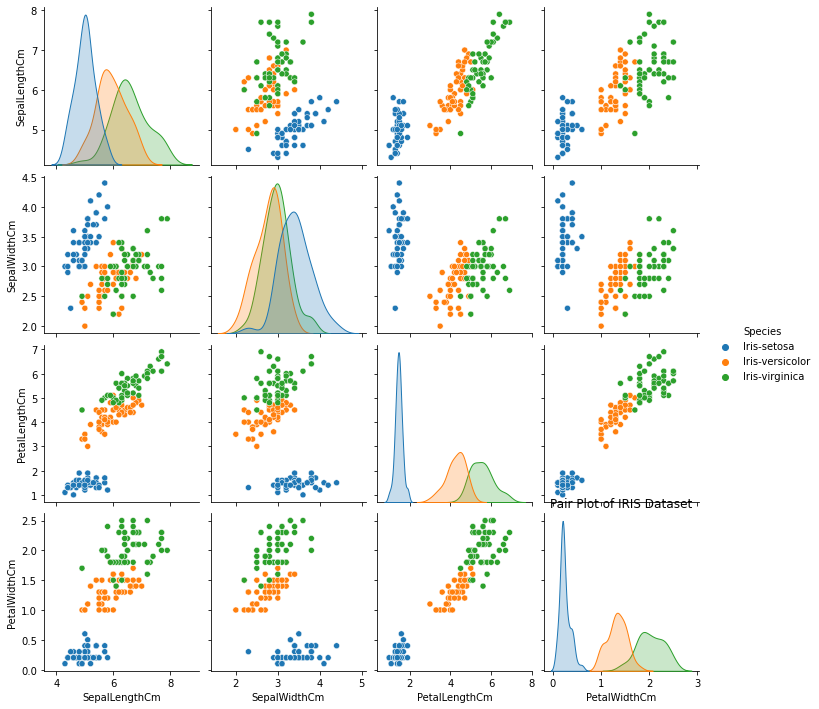

In [20]:
sns.pairplot(df, hue='Species')
plt.title('Pair Plot of IRIS Dataset')
plt.show()

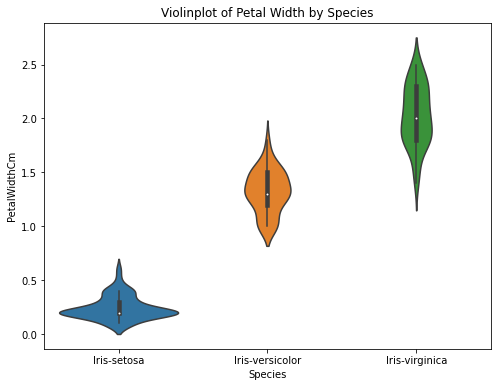

In [21]:
# Violinplot of Petal Width for each species
plt.figure(figsize=(8, 6))
sns.violinplot(x='Species', y='PetalWidthCm', data=df)
plt.title('Violinplot of Petal Width by Species')
plt.show()

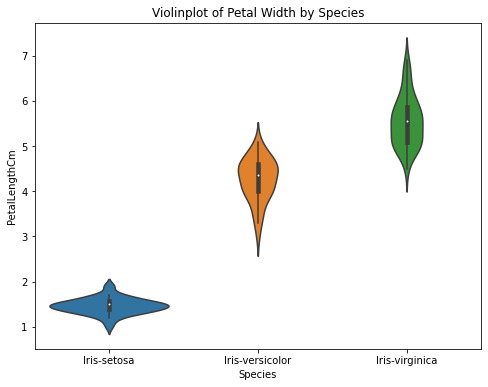

In [22]:
# Violonplot of Petal Length for each species
plt.figure(figsize=(8, 6))
sns.violinplot(x='Species', y='PetalLengthCm', data=df)
plt.title('Violinplot of Petal Width by Species')
plt.show()

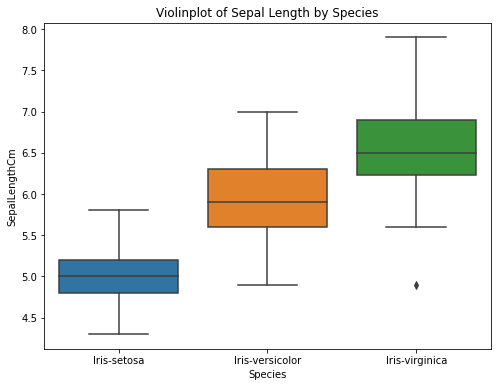

In [23]:
# Boxplot of Sepal Length for each species
plt.figure(figsize=(8, 6))
sns.boxplot(x='Species', y='SepalLengthCm', data=df)
plt.title('Violinplot of Sepal Length by Species')
plt.show()

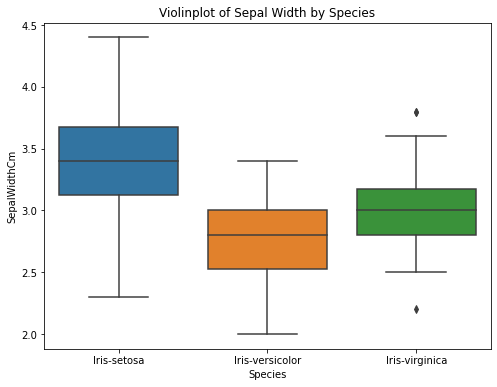

In [24]:
# Boxplot of Sepal Width for each species
plt.figure(figsize=(8, 6))
sns.boxplot(x='Species', y='SepalWidthCm', data=df)
plt.title('Violinplot of Sepal Width by Species')
plt.show()

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

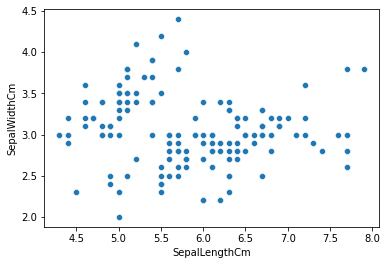

In [25]:
sns.scatterplot(df['SepalLengthCm'],df['SepalWidthCm'])

<AxesSubplot:xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

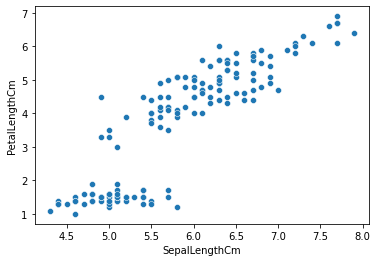

In [26]:
sns.scatterplot(df['SepalLengthCm'],df['PetalLengthCm'])

<AxesSubplot:xlabel='SepalLengthCm', ylabel='PetalWidthCm'>

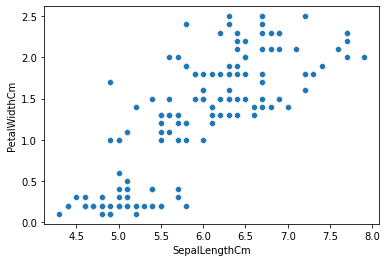

In [27]:
sns.scatterplot(df['SepalLengthCm'],df['PetalWidthCm'])

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

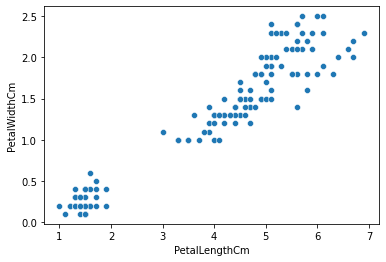

In [28]:
sns.scatterplot(df['PetalLengthCm'],df['PetalWidthCm'])

# Model Building

In [29]:
# Encode the target variable
label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])

In [30]:
# Split the data into features (X) and target variable (y)
X = df.drop('Species',axis=1)
y = df['Species']

In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
# Define a list of models to evaluate
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Support Vector Machine', SVC())
]

# Initialize an empty DataFrame to store model names and accuracies
results_df = pd.DataFrame(columns=['Model', 'Accuracy'])

# Train and evaluate each model
for model_name, model in models:
    print('Model:', model_name)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy:', accuracy)
    print('Classification Report:')
    print(classification_report(y_test,y_pred))
    print('Confusion Matrix:')
    print(confusion_matrix(y_test,y_pred))
    print('-' * 50)

    # Append the model name and accuracy to the results DataFrame
    results_df = results_df.append({'Model': model_name, 'Accuracy': accuracy}, ignore_index=True)

# Print the results DataFrame
print('Results:')
results_df

Model: Logistic Regression
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
--------------------------------------------------
Model: Decision Tree
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion 

,Model,Accuracy
0,Logistic Regression,1.0
1,Decision Tree,1.0
2,Random Forest,1.0
3,Gradient Boosting,1.0
4,AdaBoost,1.0
5,K-Nearest Neighbors,1.0
6,Support Vector Machine,1.0


# Model Building after Scaling

In [33]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Support Vector Machine', SVC())
]

# Initialize an empty DataFrame to store model names and accuracies
results_scaled_df = pd.DataFrame(columns=['Model', 'Accuracy'])

# Train and evaluate each model
for model_name, model in models:
    print('Model:', model_name)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy:', accuracy)
    print('Classification Report:')
    print(classification_report(y_test,y_pred))
    print('Confusion Matrix:')
    print(confusion_matrix(y_test,y_pred))
    print('-' * 50)

    # Append the model name and accuracy to the results DataFrame
    results_scaled_df = results_scaled_df.append({'Model': model_name, 'Accuracy': accuracy}, ignore_index=True)

# Print the results DataFrame
print('Results:')
results_scaled_df

Model: Logistic Regression
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
--------------------------------------------------
Model: Decision Tree
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion 

,Model,Accuracy
0,Logistic Regression,1.0
1,Decision Tree,1.0
2,Random Forest,1.0
3,Gradient Boosting,1.0
4,AdaBoost,1.0
5,K-Nearest Neighbors,1.0
6,Support Vector Machine,1.0


# Deep Learning 

In [34]:
# Extract the feature columns
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Encode the target variable
label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])
num_classes = df['Species'].nunique()

# Split the data into features (X) and target variable (y)
X = df[features]
y = df['Species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the target variable to one-hot encoded vectors
y_train_encoded = to_categorical(y_train, num_classes)
y_test_encoded = to_categorical(y_test, num_classes)

# Build the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(4,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train_encoded, batch_size=32, epochs=100, validation_split=0.1, verbose=1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_scaled, y_test_encoded, verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)


Epoch 1/100
3/3 [==============================] - 2s 231ms/step - loss: 1.0919 - accuracy: 0.3298 - val_loss: 1.0601 - val_accuracy: 0.5455
Epoch 2/100
3/3 [==============================] - 0s 31ms/step - loss: 1.0336 - accuracy: 0.8404 - val_loss: 1.0238 - val_accuracy: 0.8182
Epoch 3/100
3/3 [==============================] - 0s 28ms/step - loss: 0.9851 - accuracy: 0.8511 - val_loss: 0.9855 - val_accuracy: 0.8182
Epoch 4/100
3/3 [==============================] - 0s 29ms/step - loss: 0.9269 - accuracy: 0.8511 - val_loss: 0.9348 - val_accuracy: 0.8182
Epoch 5/100
3/3 [==============================] - 0s 20ms/step - loss: 0.8574 - accuracy: 0.8511 - val_loss: 0.8683 - val_accuracy: 0.8182
Epoch 6/100
3/3 [==============================] - 0s 16ms/step - loss: 0.7682 - accuracy: 0.8511 - val_loss: 0.7868 - val_accuracy: 0.8182
Epoch 7/100
3/3 [==============================] - 0s 24ms/step - loss: 0.6671 - accuracy: 0.8617 - val_loss: 0.6982 - val_accuracy: 0.8182
Epoch 8/100
3/3 [==

3/3 [==============================] - 0s 25ms/step - loss: 0.0229 - accuracy: 0.9894 - val_loss: 0.9482 - val_accuracy: 0.9091
Epoch 60/100
3/3 [==============================] - 0s 24ms/step - loss: 0.0219 - accuracy: 0.9894 - val_loss: 0.9991 - val_accuracy: 0.9091
Epoch 61/100
3/3 [==============================] - 0s 33ms/step - loss: 0.0222 - accuracy: 1.0000 - val_loss: 1.0289 - val_accuracy: 0.9091
Epoch 62/100
3/3 [==============================] - 0s 33ms/step - loss: 0.0187 - accuracy: 1.0000 - val_loss: 0.9737 - val_accuracy: 0.9091
Epoch 63/100
3/3 [==============================] - 0s 29ms/step - loss: 0.0210 - accuracy: 0.9894 - val_loss: 0.9807 - val_accuracy: 0.9091
Epoch 64/100
3/3 [==============================] - 0s 28ms/step - loss: 0.0174 - accuracy: 1.0000 - val_loss: 1.0647 - val_accuracy: 0.9091
Epoch 65/100
3/3 [==============================] - 0s 26ms/step - loss: 0.0167 - accuracy: 1.0000 - val_loss: 1.1243 - val_accuracy: 0.9091
Epoch 66/100
3/3 [========

### Check for Overfitting

If the model is overfitting, you may observe that the training accuracy continues to increase while the validation accuracy plateaus or starts to decrease. Similarly, the training loss may keep decreasing while the validation loss reaches a minimum and starts to increase again. These patterns indicate that the model is performing well on the training data but is not generalizing well to unseen data, which is a sign of overfitting.

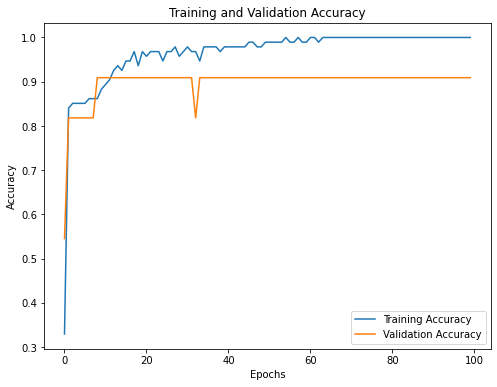

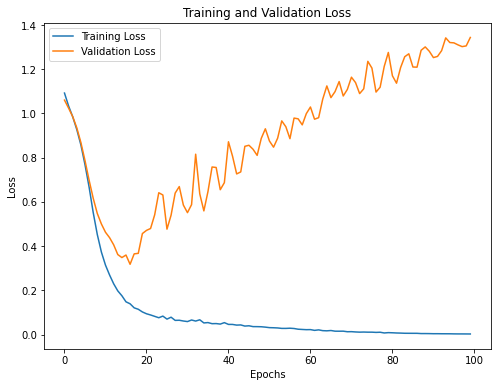

In [35]:
# Get the training and validation accuracy from the training history
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Get the training and validation loss from the training history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot the accuracy
plt.figure(figsize=(8, 6))
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the loss
plt.figure(figsize=(8, 6))
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [36]:
# Build the neural network model with dropout and L2 regularization
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(4,), kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Train the model with early stopping and validation data
history = model.fit(X_train_scaled, y_train_encoded, batch_size=32, epochs=100, validation_split=0.1, callbacks=[early_stopping], verbose=1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_scaled, y_test_encoded, verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Epoch 1/100
3/3 [==============================] - 2s 199ms/step - loss: 3.1777 - accuracy: 0.2979 - val_loss: 3.0291 - val_accuracy: 0.3636
Epoch 2/100
3/3 [==============================] - 0s 29ms/step - loss: 3.1280 - accuracy: 0.2447 - val_loss: 2.9760 - val_accuracy: 0.6364
Epoch 3/100
3/3 [==============================] - 0s 20ms/step - loss: 3.0373 - accuracy: 0.3298 - val_loss: 2.9286 - val_accuracy: 0.6364
Epoch 4/100
3/3 [==============================] - 0s 23ms/step - loss: 3.0095 - accuracy: 0.3404 - val_loss: 2.8822 - val_accuracy: 0.6364
Epoch 5/100
3/3 [==============================] - 0s 30ms/step - loss: 2.8728 - accuracy: 0.4468 - val_loss: 2.8355 - val_accuracy: 0.6364
Epoch 6/100
3/3 [==============================] - 0s 30ms/step - loss: 2.8641 - accuracy: 0.4362 - val_loss: 2.7905 - val_accuracy: 0.6364
Epoch 7/100
3/3 [==============================] - 0s 28ms/step - loss: 2.8464 - accuracy: 0.3617 - val_loss: 2.7455 - val_accuracy: 0.6364
Epoch 8/100
3/3 [==

3/3 [==============================] - 0s 27ms/step - loss: 1.1441 - accuracy: 0.8085 - val_loss: 1.0944 - val_accuracy: 0.9091
Epoch 60/100
3/3 [==============================] - 0s 29ms/step - loss: 1.1336 - accuracy: 0.8404 - val_loss: 1.0835 - val_accuracy: 0.9091
Epoch 61/100
3/3 [==============================] - 0s 31ms/step - loss: 1.0168 - accuracy: 0.8830 - val_loss: 1.0693 - val_accuracy: 0.9091
Epoch 62/100
3/3 [==============================] - 0s 26ms/step - loss: 1.0708 - accuracy: 0.8298 - val_loss: 1.0566 - val_accuracy: 0.9091
Epoch 63/100
3/3 [==============================] - 0s 28ms/step - loss: 1.0279 - accuracy: 0.8617 - val_loss: 1.0405 - val_accuracy: 0.9091
Epoch 64/100
3/3 [==============================] - 0s 27ms/step - loss: 1.0164 - accuracy: 0.8830 - val_loss: 1.0209 - val_accuracy: 0.9091
Epoch 65/100
3/3 [==============================] - 0s 26ms/step - loss: 1.0011 - accuracy: 0.8617 - val_loss: 0.9996 - val_accuracy: 0.9091
Epoch 66/100
3/3 [========

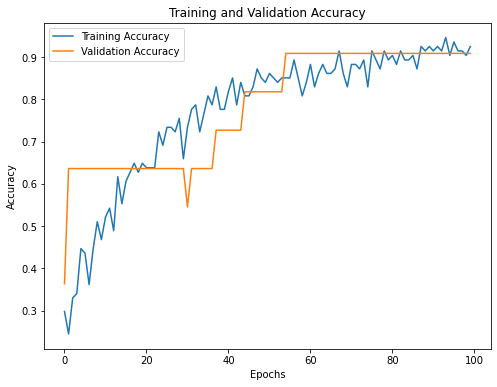

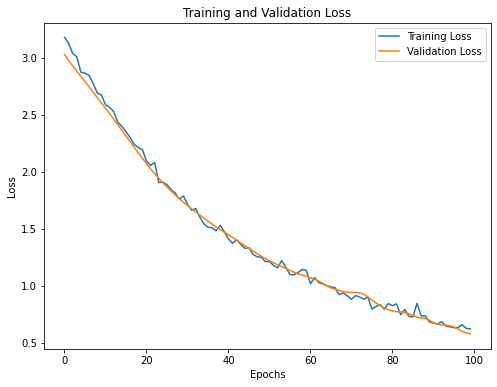

In [37]:
# Get the training and validation accuracy from the training history
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Get the training and validation loss from the training history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot the accuracy
plt.figure(figsize=(8, 6))
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the loss
plt.figure(figsize=(8, 6))
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [38]:
# Save the random forest model

In [39]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy:',accuracy)

Accuracy: 1.0


In [40]:
# Save the trained model to a file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf, file)

In [41]:
# Save the trained model to a file
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)